<a href="https://colab.research.google.com/github/MennatallahELKhateeb/Brainwave_Matrix_Intern_Task2/blob/main/ChatGPT_Public_Sentiment_Analysis_Using_Twitter_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
import pandas as pd
import io

# رفع الملف
uploaded = files.upload()

# قراءة الملف
df = pd.read_csv(io.BytesIO(uploaded['Twitter Jan Mar.csv']))

# عرض أول 5 صفوف للتأكد
df.head()


Saving Twitter Jan Mar.csv to Twitter Jan Mar.csv


,date,id,content,username,like_count,retweet_count
0,2023-03-29 22:58:21+00:00,1641213230730051584,"Free AI marketing and automation tools, strate...",RealProfitPros,0.0,0.0
1,2023-03-29 22:58:18+00:00,1641213218520481805,@MecoleHardman4 Chat GPT says it’s 15. 😂,AmyLouWho321,0.0,0.0
2,2023-03-29 22:57:53+00:00,1641213115684536323,https://t.co/FjJSprt0te - Chat with any PDF!\n...,yjleon1976,0.0,0.0
3,2023-03-29 22:57:52+00:00,1641213110915571715,"AI muses: ""In the court of life, we must all f...",ChatGPT_Thinks,0.0,0.0
4,2023-03-29 22:57:26+00:00,1641213003260633088,Most people haven't heard of Chat GPT yet.\nFi...,nikocosmonaut,0.0,0.0


In [5]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# دالة لتنظيف كل تغريدة
def clean_tweet(tweet):
    tweet = str(tweet).lower()                      # تحويل لحروف صغيرة
    tweet = re.sub(r'http\S+|www.\S+', '', tweet)   # حذف الروابط
    tweet = re.sub(r'@\w+|#\w+', '', tweet)         # حذف المنشنات والهاشتاجات
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)       # حذف الرموز والأرقام
    tokens = word_tokenize(tweet)                   # التقطيع
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words and len(w) > 2]
    return " ".join(tokens)

# استبدال 'text' بـ 'content'
df['clean_text'] = df['content'].apply(clean_tweet)

# عرض النتائج
df[['content', 'clean_text']].head()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,content,clean_text
0,"Free AI marketing and automation tools, strate...",free marketing automation tool strategy collab...
1,@MecoleHardman4 Chat GPT says it’s 15. 😂,chat gpt say
2,https://t.co/FjJSprt0te - Chat with any PDF!\n...,chat pdf check new quickly answer question pdf...
3,"AI muses: ""In the court of life, we must all f...",mus court life must face judge destiny jury ac...
4,Most people haven't heard of Chat GPT yet.\nFi...,people havent heard chat gpt yet first elite f...


In [6]:
!pip install textblob
from textblob import TextBlob


In [7]:
# تحليل المشاعر
df['polarity'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# التصنيف حسب المشاعر
def get_sentiment(p):
    if p > 0:
        return 'Positive'
    elif p < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['polarity'].apply(get_sentiment)

# عرض النتيجة
df[['content', 'clean_text', 'polarity', 'subjectivity', 'sentiment']].head()


,content,clean_text,polarity,subjectivity,sentiment
0,"Free AI marketing and automation tools, strate...",free marketing automation tool strategy collab...,0.268182,0.627273,Positive
1,@MecoleHardman4 Chat GPT says it’s 15. 😂,chat gpt say,0.000000,0.000000,Neutral
2,https://t.co/FjJSprt0te - Chat with any PDF!\n...,chat pdf check new quickly answer question pdf...,0.342424,0.738636,Positive
3,"AI muses: ""In the court of life, we must all f...",mus court life must face judge destiny jury ac...,0.100000,0.100000,Positive
4,Most people haven't heard of Chat GPT yet.\nFi...,people havent heard chat gpt yet first elite f...,0.041667,0.250000,Positive


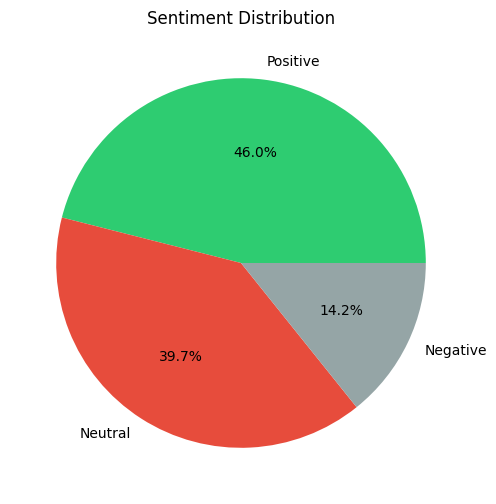

In [8]:
import matplotlib.pyplot as plt

# عدد كل نوع مشاعر
sentiment_counts = df['sentiment'].value_counts()

# رسم الدائرة
plt.figure(figsize=(6,6))
colors = ['#2ecc71','#e74c3c','#95a5a6']
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Sentiment Distribution')
plt.show()


2023-01-04 2023-03-29


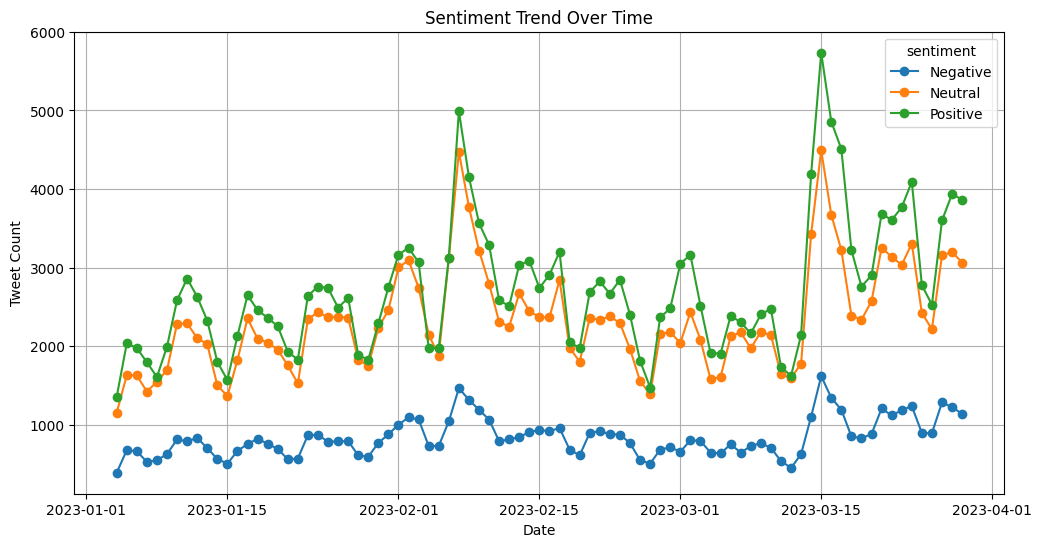

In [11]:
# تحويل التاريخ بشكل مرن
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# إزالة أي صف مفيهوش تاريخ
df = df.dropna(subset=['date'])

# التأكد إن كله تمام
print(df['date'].dt.date.min(), df['date'].dt.date.max())

daily_sentiment = df.groupby([df['date'].dt.date, 'sentiment']).size().unstack().fillna(0)

daily_sentiment.plot(figsize=(12,6), marker='o')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.grid(True)
plt.show()


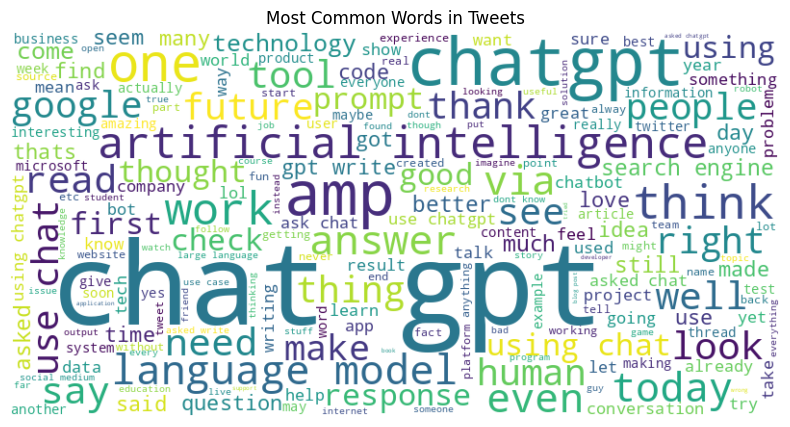

In [12]:
from wordcloud import WordCloud

text = ' '.join(df['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Tweets')
plt.show()


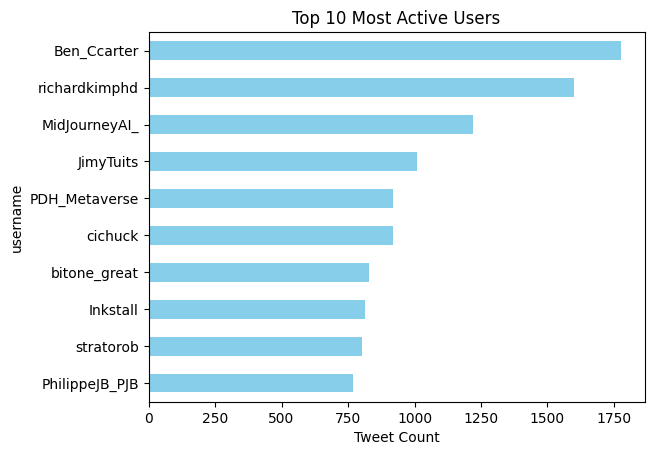

In [13]:
top_users = df['username'].value_counts().head(10)
top_users.plot(kind='barh', color='skyblue')
plt.xlabel('Tweet Count')
plt.title('Top 10 Most Active Users')
plt.gca().invert_yaxis()
plt.show()
